In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/crop_production.csv")

In [ ]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [ ]:
df.shape

(246091, 7)

In [ ]:
data = df.dropna()
print(data.shape)
test = df[~df["Production"].notna()].drop("Production",axis=1)
print(test.shape)

(242361, 7)
(3730, 6)


In [ ]:
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [ ]:
test

,State_Name,District_Name,Crop_Year,Season,Crop,Area
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67
51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00
...,...,...,...,...,...,...
244128,West Bengal,MEDINIPUR WEST,2010,Rabi,Peas & beans (Pulses),2.00
244581,West Bengal,MURSHIDABAD,2006,Kharif,Moong(Green Gram),200.00
245606,West Bengal,PURULIA,2001,Rabi,Rapeseed &Mustard,427.00
245644,West Bengal,PURULIA,2002,Rabi,Rapeseed &Mustard,522.00


In [ ]:
data[:5]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


*DATA VISUALISATION*

In [ ]:
import plotly.express as px ## Visualization
import plotly.graph_objects as go ## Visualization
import matplotlib.pyplot as plt ## Visualization
import plotly as py ## Visuaization
from plotly import tools ## Visualization
import os

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



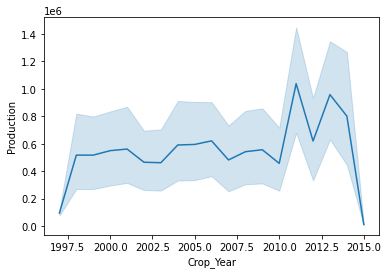

In [ ]:
sns.lineplot(data["Crop_Year"],data["Production"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

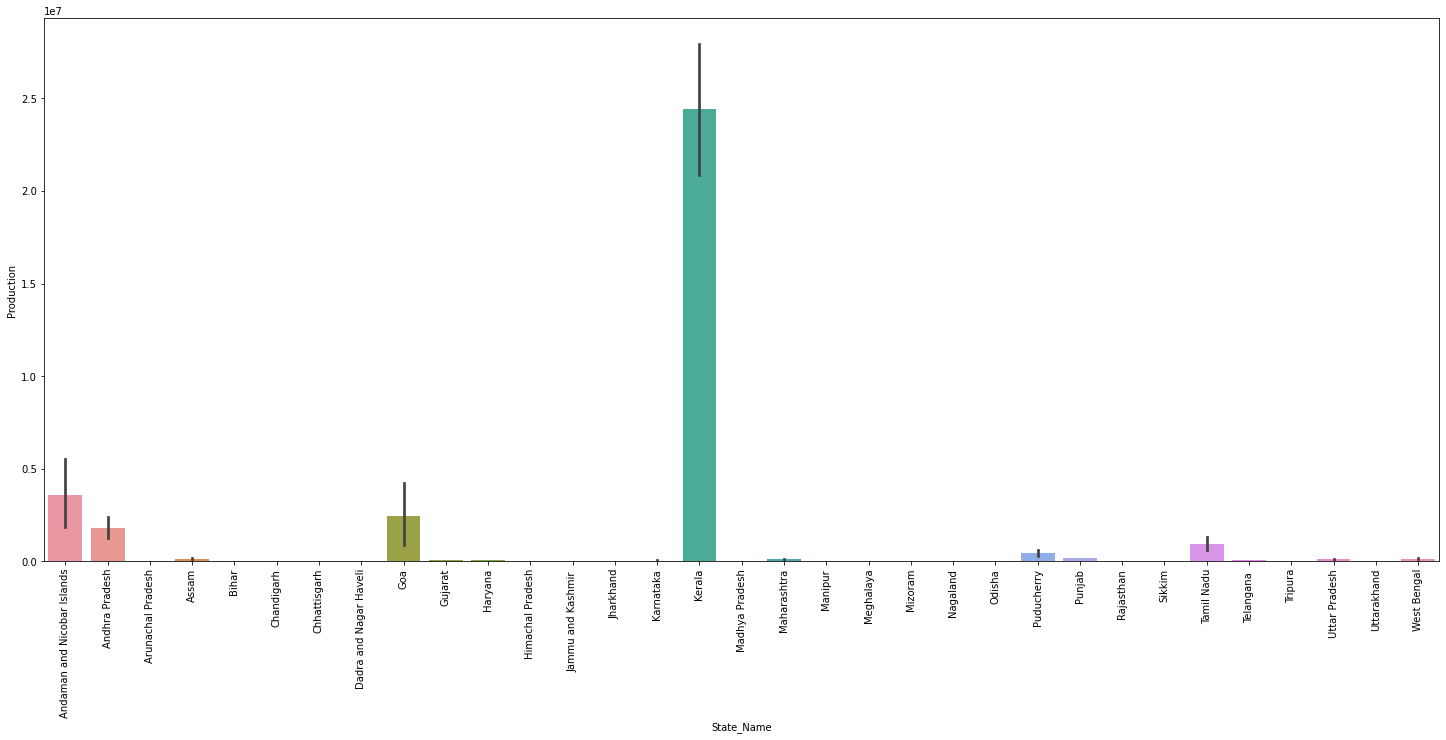

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(data["State_Name"],data["Production"])
plt.xticks(rotation=90)

In [ ]:
data.groupby("Season",axis=0).agg({"Production":np.sum})

,Production
Season,
Autumn,6.441377e+07
Kharif,4.029970e+09
Rabi,2.051688e+09
Summer,1.706579e+08
Whole Year,1.344248e+11
Winter,4.345498e+08


In [ ]:
data["Crop"].value_counts()[:5]

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Name: Crop, dtype: int64

In [ ]:
top_crop_pro = data.groupby("Crop")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_crop_pro[:5]

,Crop,Production
28,Coconut,1.299816e+11
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08


In [ ]:
temp = data.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(temp, 'State_Name', 'Production')

In [ ]:
#PRODUCTIVITY OF DIFFERENT STATES
temp = data.groupby('State_Name')['Area', 'Production'].sum().reset_index()
temp['Production_Per_Unit_Area'] = temp['Production']/temp['Area']
temp = temp.sort_values(by='Production_Per_Unit_Area')
px.bar(temp, 'State_Name', 'Production_Per_Unit_Area', color='Production_Per_Unit_Area', )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
#AVERAGE PRODUCTION THROUGH YEARS
temp = data.groupby(by='Crop_Year')['Area'].mean().reset_index()
px.scatter(temp, 'Crop_Year', 'Area', color='Area', size='Area')

INSIGHTS DERIVED:

Average Crop Area has decresed over the years.

We had the lowest Average Crop area in Years 2002 and 2003.

In [ ]:
#MOST AND LEAST PRODUCING CROP DISTRICTS
fig = py.subplots.make_subplots(rows=1,cols=2,
                    subplot_titles=('Highest crop producing districts', 'Least overall crop producing districts'))

temp = data.groupby(by='District_Name')['Production'].sum().reset_index().sort_values(by='Production')
temp1 = temp.tail()
trace1 = go.Bar(x= temp1['District_Name'], y=temp1['Production'])

temp1=temp.head()
trace2 = go.Bar(x= temp1['District_Name'], y=temp1['Production'])

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.show()
del temp,temp1

In [ ]:
#MOST PRODUCED CROPS
temp = data.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(temp.tail(), 'Crop', 'Production')

In [ ]:
#NOT PROdUCEd CROPS
temp[temp['Production']==0]

,Crop,Production
0,Apple,0.0
79,Pear,0.0
72,Other Dry Fruit,0.0
71,Other Citrus Fruit,0.0
80,Peas (vegetable),0.0
84,Plums,0.0
89,Pump Kin,0.0
58,Litchi,0.0
54,Lab-Lab,0.0
94,Ribed Guard,0.0


In [ ]:
#COCONUT
coconut = data[data['Crop']=='Coconut ']

fig = py.subplots.make_subplots(rows=1,cols=2,subplot_titles=('Coconut production in different states', 'Coconut crop area in states'))

temp = coconut.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production')
trace0 = go.Bar(x=temp['State_Name'], y=temp['Production'])

temp = coconut.groupby(by='State_Name',)['Area'].mean().reset_index().sort_values(by='Area')
trace1 = go.Bar(x=temp['State_Name'], y=temp['Area'])

fig.append_trace(trace0, 1,1)
fig.append_trace(trace1, 1,2)
fig.show()

In [ ]:
temp = coconut.groupby(by='Crop_Year')['Production'].sum().reset_index()
px.line(temp, 'Crop_Year', 'Production', title='Coconut production over the years')

In [ ]:
#EXPLORING A BIT MORE ABOUT KERALA
kerala = data[data['State_Name']=='Kerala']
temp = kerala.groupby(by='Crop')['Production'].mean().reset_index().sort_values(by='Production')
px.bar(temp, 'Crop', 'Production', title = 'Avg. Crop Production')

In [ ]:
 #in previous graph as coconut is produced in larger scale, we are just removing it and exploring the crops produced in the remaining  dataset
kerala = kerala[~(kerala['Crop']=='Coconut ')]
temp = kerala.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(temp, 'Crop', 'Production', title='AVG. Crop Production excluding coconut')


In [ ]:
#EDA on the dataset excluding kerala and coconut
data1 = data[~((data['State_Name']=='Kerala') | (data['Crop']=='Coconut '))]

In [ ]:
data1

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [ ]:
temp=data1.groupby('Crop')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(temp, 'Crop', 'Production', title='Overall production of crops')